# Ising model

### Physics 481 Week 05

https://en.wikipedia.org/wiki/Ising_model

The Ising model (/ˈaɪsɪŋ/; German: [ˈiːzɪŋ]), named after the physicist Ernst Ising, is a mathematical model of ferromagnetism in statistical mechanics. The model consists of discrete variables that represent magnetic dipole moments of atomic spins that can be in one of two states (+1 or −1). The spins are arranged in a graph, usually a lattice, allowing each spin to interact with its neighbors. The model allows the identification of phase transitions, as a simplified model of reality. The two-dimensional square-lattice Ising model is one of the simplest statistical models to show a phase transition.

The Ising model was invented by the physicist Wilhelm Lenz (1920), who gave it as a problem to his student Ernst Ising. The one-dimensional Ising model has no phase transition and was solved by Ising (1925) himself in his 1924 thesis. The two-dimensional square lattice Ising model is much harder, and was given an analytic description much later, by Lars Onsager (1944). It is usually solved by a transfer-matrix method, although there exist different approaches, more related to quantum field theory.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dipole energy

It can be shown that the energy $U$ required to align a magnetic dipole $m$ in a magnetic field $B$ is given by

  $$U = - \vec m \cdot \vec B = - m B \cos\theta $$

where $\theta$ is the angle between the dipole moment and field directions.  The lowest potential energy configuration occurs if they are parallel

  $$ U = - m B $$

while the largest amount of potential energy is stored in the system if the dipole and field are pointing in opposite directions

  $$ U = + m B $$

## Boltzman distribution

If a small system is in thermal equilibrium with a "heat-sink" of temperature T, then the probability of states for the small system should follow a Boltzman distribution which is an exponential function of the ratio of energy (E) to temperature.

$$ p(\mathbf x) \propto \exp \left(-\frac{E(\mathbf x)}{k T}\right) $$

Consider the simplest possible case of two states with energies $E_1$ and $E_2$.  The probabilities have an exponential dependence on energy

  $$ p_1 \propto \exp \left(-\frac{E_1}{k T}\right) $$

  $$ p_2 \propto \exp \left(-\frac{E_2}{k T}\right) $$

which means that the relative probability of two different states is

$$ r = \frac{p_f}{p_i} \propto e^{(E_2-E_1)/kT} $$

is an exponential function of the *energy difference* $\Delta E = E_2 - E_1$.

It is important to note that these probabilities are un-normalized (don't add up to one).  

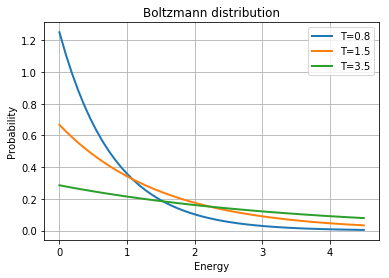

In [2]:
ax = plt.subplot(xlabel="Energy", ylabel="Probability", title="Boltzmann distribution")
E = np.linspace(0, 4.5, num=50)

for i, T in enumerate([0.8, 1.5, 3.5]):
    ax.plot(E, 1.0/T*np.exp(-E/T), "-", label="T={}".format(T), lw=2 )
ax.legend()
plt.grid()

C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


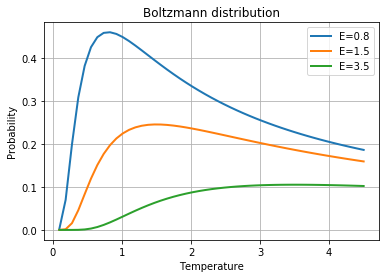

In [11]:
ax = plt.subplot(xlabel="Temperature", ylabel="Probability", title="Boltzmann distribution")
T = np.linspace(0, 4.5, num=50)

for i, E in enumerate([0.8, 1.5, 3.5]):
    ax.plot(T, 1.0/T*np.exp(-E/T), "-", label="E={}".format(E), lw=2 )
ax.legend()
plt.grid()

## Partition function

The normalization constant $C$ can be determined by using the fact that the total of all probabilities must sum to 1

  $$ \sum_k p_k = 1$$
  
For the two spin system this gives

  $$ C\, \exp \left(-\frac{E_1}{k T}\right) + C\, \exp \left(-\frac{E_2}{k T}\right) = 1 $$

so

$$ C = \frac{1}{e^{\left( -\frac{E_1}{k T} \right)}
+ e^{\left( -\frac{E_2}{k T} \right)}} $$

It will be more convenient to work with the reciprocal of this constant

$$ Z = e^{\left( -\frac{E_1}{k T} \right)}
+ e^{\left( -\frac{E_2}{k T} \right)} $$

which is also known as the "partition function".  This allows us to express the probabilities as

  $$ p_k = \frac{1}{Z}\, \exp \left(-\frac{E_k}{k_B T}\right) $$


## $\beta \propto 1/T$

For further convenience, we can define a new term

  $$ \beta = \frac{1}{k_B T}  $$

which is inversely proportional to temperature so that

  $$ p_k = \frac{e^{-\beta E_k}}{Z} $$

## Monte Carlo

The behavior of a single dipole in thermal equilibrium with an external field will depend on quantum mechanics, electrodynamics, and statistical physics.  However, it is also possible to gain some physical insight using very simple models.

We can start with a cellular automaton approach using a single element.  At each time step the state may be either +1 (up) or -1 (down).  

However, we require that the sequence of states must also be consistent with a Boltzman probability distribution.

### Gibbs sampling

Consider two spin states with energies $E_+ = +E$ and $E_-=-E$ 

$$ \Delta E = E_+ - E_- = 2E $$

It is relatively simple to calculate the partition function

$$ Z = e^{\left( -\frac{E}{k T} \right)}
+ e^{\left( +\frac{E}{k T} \right)} $$

and probabilities

 $$ p_+ = \frac{1}{1 + \exp(-\beta \Delta E )} $$
 
 $$ p_- = \frac{1}{1 + \exp(+\beta \Delta E )} $$

and use them to generate random sequences

    state = np.random.choice([-1, +1], p=[p1,p2])

## Many independent states

Consider a collection of $N$ independent dipoles with state $S=\pm 1$ in an external magnetic field $B$.  The energy associated with the entire system is given by  

  $$ E = -B \sum_k S_k $$
  
For example, with 2 independent distinguishable dipoles there are 4 possible states 

      S1  S2   Energy  Probability (un-normalized)
     +1  +1   -2B      exp(+beta 2B)
     +1  -1    0B      1
     -1  +1    0B      1
     -1  -1    2B      exp(-beta 2B)
     
but only 3 unique energy configurations, so the partition function is given by

 $$ Z = \exp(-2B \beta) + 2 \exp(0) + \exp(+2B \beta) $$

 $$ p_i = \frac{e^{-E/T}}{Z} $$

state = np.random.choice([(+1,+1),(+1,-1),(-1,+1),(-1,-1)], p=[p1,p2,p3,p4])

For $N$ binary elements there will be $2^N$ configurations. Applying the Gibb's sampler will become computationally challenging long before we reach Avagadro's number.

#### Question: Write a function which will calculate all of the energy states and probabilities for an arbitrary number of independent dipoles.  Tabulate the results for $N=3$, $\beta=0.1$ and $B=2$

#### Question: Write a function which will return a Boltzmann random state for an arbitrary number $N$ of independent dipoles.  Plot the time required to produce the result as a function of $N$.  iscuss your results.

### Metropolis

An alternative approach is provided by the Metropolis algorithm. It is based on Markov chains and uses an equilibrium condition called detailed balance to prove a simple assumption: If the system is in a state with energy E0 and we flip the spin of a single randomly selected element so that the system now has E1, the probability to accept that change should be:

p=min(1,exp(−ΔE/T)) with ΔE=E1−E0

In other words, if we start in a high energy state then we will always flip into a low energy state.  If we are in a lower energy state there is some small chance of flipping into a high energy state.  This "uphill" transition is more likely for higher temperatures and less likely for low temperatures.

#### Question: Use the metropolis algorithm to generate a sequence of states for a single dipole with T=300K, dE=0.1, 1, 10eV.  Calculate the expected probabilities for each state and compare to the computed results for 1000 iterations.

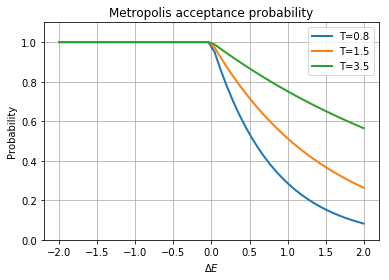

In [4]:
ax = plt.subplot(xlabel="$\Delta E$", ylabel="Probability", ylim=(0,1.1), title="Metropolis acceptance probability")
dE = np.linspace(-2, 2)

for i, T in enumerate([0.8, 1.5, 3.5]):
    ax.plot(dE, np.minimum(1, np.exp(-dE/T)), "-", label="T={}".format(T), lw=2)
ax.legend()
plt.grid()

## Interacting 1D
Each dipole will generate a (small) magnetic field that may influence other dipoles.  We can explore this possibility by arranging a number of binary spins $S_k$ in a row (or a ring) and then introduce a weak coupling term

 $$ E_i = -J \,S_{i-1} S_i - J \,S_{i+1} S_k
  = -J \sum_j S_i S_j  \qquad j=i+1, i-1
 $$
that can only affect the nearest neighbors.

#### Question: Write python code to evolve a system of $N$ dipoles in a ring (wrap-around boundary conditions) using the Metropolis algorithm for arbitrary $N$, $B$, $T$, $J$.

## 2-D Ising model

Read the notes in D2L: Ising_Model_MIT_Notes.pdf

Read through this jupyter notebook: 

http://nbviewer.jupyter.org/github/s9w/magneto/blob/master/physics.ipynb

Consider a lattice of N sites, each containing a spin $S_n$ where $n=1,\ldots,N$.  Each spin can be either "up" ($S_n = +1$) or down ($S_n=-1$).  Each spin interacts magnetically with its nearest four neighbors (above, below, left, right) and with an external magnetic field (if present).  The Hamiltonian for this Ising model is

$$ E(S_1,\ldots,S_N) = -J \sum_{i,j} S_i S_j - B \sum_k S_k $$

where the interaction sum $i,j$ is over the four nearest-neighbour pairs of spins ie. $S_{ij}$ interacts with $S_{i\pm 1,j}$ and $S_{i,j \pm 1}$ and the diagonal neighbors are ignored.

### Stochastic
Any randomly created lattice will have some total energy $E$.  Flipping a single electron might require adding or removing a tiny bit of energy $dE$.  If the lattice is in thermal equilibrium with a "heat-sink" of temperature T, then the probability of states should be Boltzman distributed

$$ p(\mathbf x) \propto \exp(-\frac{E(\mathbf x)}{k T}) $$

and the relative probability of two different states is

$$ r = \frac{p_f}{p_i} = e^{(E_f-Ei)/kT} $$

If we only consider the effect of a single flip $S_n$, then 

$$ r = e^{-2 S_n (J f + B)/kt} $$

where all the information about neighbors is gathered into a term

$$ f = S_{i+1,j} + S_{i-1,j} + S_{i,j+1} + S_{i,j-1}$$

with only five possible values ($0, \pm 2, \pm 4$).  With two possible values of $S_n$ there are only 10 possible values for $r$, so we could compute these once at the beginning of the program in order to avoid re-calculating the same computationally expensive exponentials over and over.

#### Write python code to implement the Ising model on a 51x49 grid for arbitrary J and B.  Use 200 sweeps to thermalize and assume that the grid is randomized after 20 sweeps.

#### Produce plots for J=(kB T), B=0, B=+0.5, B=-0.5

#### For B=0 and J/(T kB)=range(0.0, 0.6, 21), calculate and plot the average magnetization M versus J/TkB.

#### Produce a hysteresis curve over an appropriate range of external magnetic field B values.

#### Produce a plot for J=-kB T.

#### Briefly discuss all of your results.

## Ising model

Some of the following code may be a useful guide when writing your own, but should not simply be used without thinking it through very carefully.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def spinflip(nearspins, J, B, T):
    """
    """
    nspins = len(nearspins)   #; print(nspins)
    local_field = J*nearspins + B
    
    probability_plus = 1.0 / (1.0 + np.exp(-2*local_field/T) )
    spin_up = probability_plus > np.random.rand(nspins)
    
    return 2*spin_up - 1
    #-------------------------------------------------------

        

In [9]:
def isingstep(grid, nsites=1, J=1.0, B=0.0, T=0.5):
    """ Pick one or more sites at random, count the neighbours, 
    and apply flips.
    """
    nx, ny = grid.shape

    # pick some random grid location(s)
    xx = (np.random.rand(nsites)*nx).astype(np.int)
    yy = (np.random.rand(nsites)*ny).astype(np.int) 

    # count neighboring spins, taking care to wrap as needed
    nn = grid[xx,(yy+1)%ny] + grid[xx,yy-1] + grid[(xx+1)%nx,yy] + grid[xx-1,yy]
    grid[xx,yy] = spinflip(nn, J, B, T)    
    
    return grid.copy()
    #----------------------------------------------------

In [10]:
def ising_model(grid, J, B, T, nsteps=1, plot=True):    
    """
    """
    nx, ny = grid.shape
    nsites = int( 0.05 * grid.size )

    if plot:
        fig = plt.gcf()
        ims = plt.imshow(grid)

    M = []  # magnetization        
    for indx in range(nsteps): 
        M.append( np.sum(grid)/np.size(grid) ) 
        
        # successive grids may be corelated, so skip a few
        for nsteps in range(9):
            grid = isingstep(grid, nsites=nsites, J=J, B=B, T=T)    
            
        if plot:
            ims.set_data(grid) #; print(np.sum(grid)/grid.size)
            fig.canvas.draw() ; fig.canvas.flush_events() ; fig.canvas.show()

    return grid, M